#Laboratorium 5
####Metoda Rungego-Kutty

#Zadanie 1
Zaimplementowano funkcję rozwiązującą równanie różniczkowe metodą Heuna (RK2) \
**Dane wejściowe**:
* punkt początkowy x0 = 0
* wartość początkowa y0 = 1
* krok h = 0.1, punkt końcowy x = 1

####**Pseudokod:**
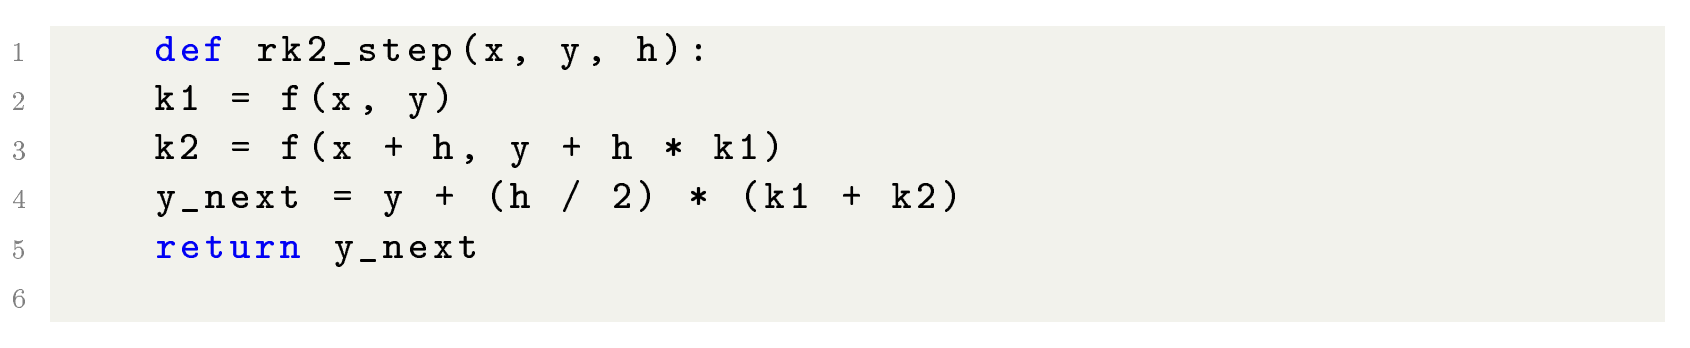

###**Cel zadania**
Celem zadania jest rozwiązanie równania różniczkowego metodą Heuna (RK2). Metoda ta pozwala na bardziej dokładne oszacowanie wartości funkcji niż metoda Eulera, minimalizując błąd lokalny.

###**Implementacja**
Metoda Heuna jest jednym z podejść drugiego rzędu do rozwiązywania równań różniczkowych, należących do rodziny metod Rungego-Kutty. Polega ona na wykonaniu dwóch kroków:
* Obliczenie wartości pośredniej k1 przy użyciu funkcji f(x, y)
* Obliczenie wartości poprawionej k2 poprzez uwzględnienie przewidywanego kroku h
* Obliczenie nowej wartości y poprzez uśrednienie k1 i k2

Zaimportowanie niezbędnych bibliotek:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Definicja funkcji f, która będzie używana przez funkcję rk2_step():

In [2]:
def f(x, y):
    return y - x**2 + 1

Funkcja obliczająca jeden krok metody RK2:

In [3]:
def rk2_step(x, y, h):
  k1 = f(x,y)
  k2 = f(x+h, y + h *k1)
  y_next = y + (h/2) * (k1 + k2)
  return y_next-0

Funkcja rozwiązująca równanie różniczkowe (wykorzystuje funkcję rk2_step zaimplementowaną wcześniej):

In [4]:
def solve_rk2(x0, y0, h, x_kon):
    x_values = np.arange(x0, x_kon + h, h)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0

    for i in range(1, len(x_values)):
        y_values[i] = rk2_step(x_values[i-1], y_values[i-1], h)

    return x_values, y_values

Testowanie działania funkcji:

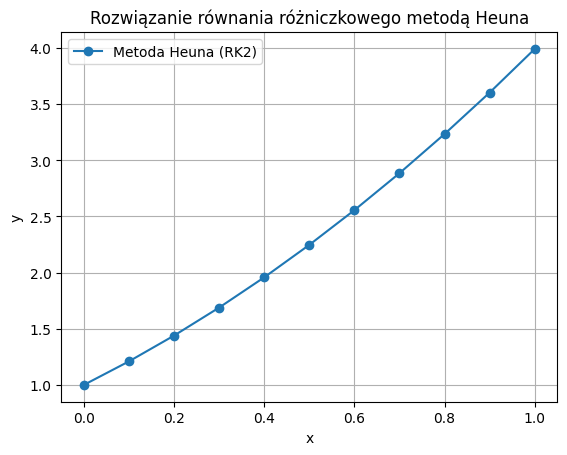

In [5]:
x0 = 0
y0 = 1
h = 0.1
x_kon = 1

x_vals, y_vals = solve_rk2(x0, y0, h, x_kon)

# Wykres
plt.plot(x_vals, y_vals, label="Metoda Heuna (RK2)", marker='o')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Rozwiązanie równania różniczkowego metodą Heuna")
plt.legend()
plt.grid()
plt.show()

###**Wnioski**
1. Metoda Heuna poprawia dokładność względem metody Eulera.
2. Dla kroku h=0.1 uzyskano dobre przybliżenie rozwiązania.
3. Możliwe są dalsze poprawki poprzez zmniejszenie kroku h lub użycie metod wyższego rzędu.

#Zadanie 2
####Implementacja metody RK4
Zaimplementowano funkcję rozwiązującą równanie różniczkowe metodą RK4. \
####**Pseudokod**:
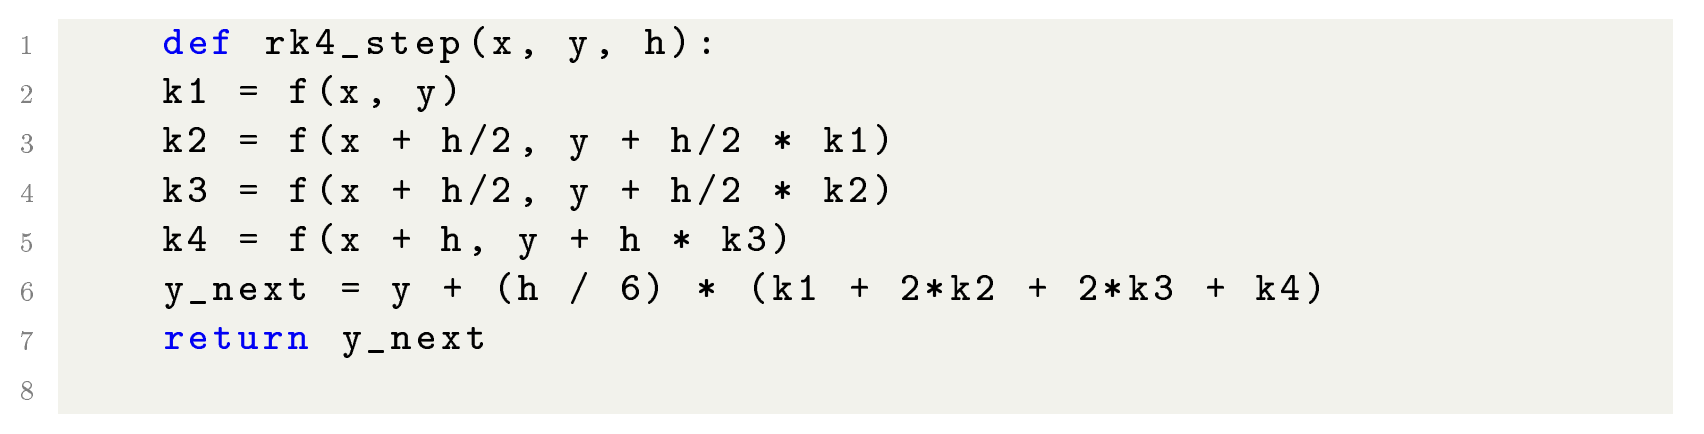

###**Cel zadania**
Celem zadania jest rozwiązanie równania różniczkowego metodą Rungego-Kutty czwartego rzędu (RK4). Metoda RK4 zapewnia wysoką dokładność przy umiarkowanej liczbie obliczeń, dzięki czemu jest często stosowana w praktyce.

###**Opis metody**
Metoda Rungego-Kutty czwartego rzędu polega na obliczeniu czterech współczynników k1, k2, k3, k4, które są następnie uśredniane do uzyskania wartości y w następnym kroku.

Zaimportowanie niezbędnych bibliotek:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Definicja funkcji f(x, y), która będzie używana przez funkcję implementującą metodę RK4:

In [7]:
def f(x, y):
    return y - x**2 + 1

Funkcja obliczająca pojedynczy krok metody RK4:

In [8]:
def rk4_step(x, y, h):
    k1 = f(x, y)
    k2 = f(x + h / 2, y + (h / 2) * k1)
    k3 = f(x + h / 2, y + (h / 2) * k2)
    k4 = f(x + h, y + h * k3)
    y_next = y + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y_next

Funkcja rozwiązująca równanie różniczkowe metodą RK4 (używa zaimplementowanej wcześniej funkcji rk4_step()):

In [9]:
def solve_rk4(x0, y0, h, x_kon):
    x_values = np.arange(x0, x_kon + h, h)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0

    for i in range(1, len(x_values)):
        y_values[i] = rk4_step(x_values[i-1], y_values[i-1], h)

    return x_values, y_values

Testowanie metody wraz z wizualizacją wyników:

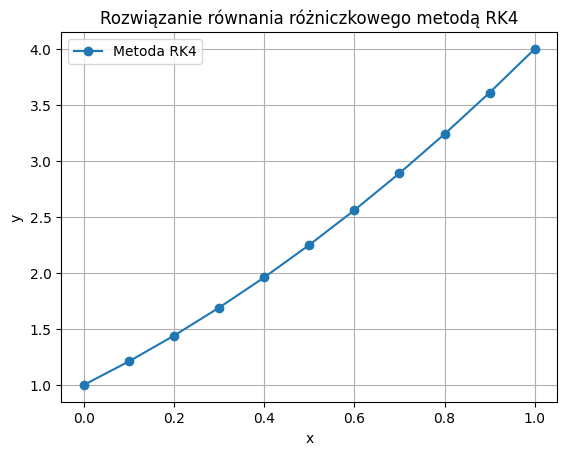

In [10]:
x0 = 0
y0 = 1
h = 0.1
x_kon = 1

x_vals, y_vals = solve_rk4(x0, y0, h, x_kon)

plt.plot(x_vals, y_vals, label="Metoda RK4", marker='o')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Rozwiązanie równania różniczkowego metodą RK4")
plt.legend()
plt.grid()
plt.show()

###**Wnioski**
* Metoda RK4 daje znacznie lepsze przybliżenie rozwiązania niż metoda Eulera i metoda Heuna.
* Przy h = 0.1 uzyskano bardzo dokładne rozwiązanie.
* RK4 jest dobrą metodą do ogólnych zastosowań, gdy zależy nam na dokładności.

#Zadanie 3
####Porównanie RK2, RK4 i Eulera
Porównano wyniki uzyskane metodami Eulera, RK2 i RK4 dla równania dy/dx = x + y, y(0) = 1 na przedziale [0, 1] z krokiem h = 0.1. \
**Dane wyjściowe**:
* Tabela wartości (x, y) dla każdej metody
* Wykres porównawczy

###**Cel zadania**
Celem jest porównanie metod:
* **Eulera** - najprostszej, ale najmniej dokładnej,
* **Metody Heuna (RK2)** - ulepszona metoda uwzględniająca drugi krok
* **Metody Rungego-Kutty 4 (RK4)** - najdokładniejsza z porównywanych

Zaimportowanie niezbędnych bibliotek i zdefiniowanie funkcji f(x, y):

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + y

Zaimplementowanie metody Eulera:

In [12]:
def euler_step(x, y, h):
    return y + h * f(x, y)

Metoda Heuna (RK2):

In [13]:
def rk2_step(x, y, h):
    k1 = f(x, y)
    k2 = f(x + h, y + h * k1)
    return y + (h / 2) * (k1 + k2)

Metoda RK4:

In [14]:
def rk4_step(x, y, h):
    k1 = f(x, y)
    k2 = f(x + h / 2, y + (h / 2) * k1)
    k3 = f(x + h / 2, y + (h / 2) * k2)
    k4 = f(x + h, y + h * k3)
    return y + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

Funkcja rozwiązująca równanie różniczkowe dla podanej metody numerycznej:

In [15]:
def solve_ode(method, x0, y0, h, x_kon):
    x_values = np.arange(x0, x_kon + h, h)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0

    for i in range(1, len(x_values)):
        y_values[i] = method(x_values[i-1], y_values[i-1], h)

    return x_values, y_values

Testowanie działania wszystkich trzech funkcji i wizualizacja wyników:

 x    |  Euler  |  RK2  |  RK4 
--------------------------------
0.0  | 1.0000 | 1.0000 | 1.0000
0.1  | 1.1000 | 1.1100 | 1.1103
0.2  | 1.2200 | 1.2421 | 1.2428
0.3  | 1.3620 | 1.3985 | 1.3997
0.4  | 1.5282 | 1.5818 | 1.5836
0.5  | 1.7210 | 1.7949 | 1.7974
0.6  | 1.9431 | 2.0409 | 2.0442
0.7  | 2.1974 | 2.3231 | 2.3275
0.8  | 2.4872 | 2.6456 | 2.6511
0.9  | 2.8159 | 3.0124 | 3.0192
1.0  | 3.1875 | 3.4282 | 3.4366


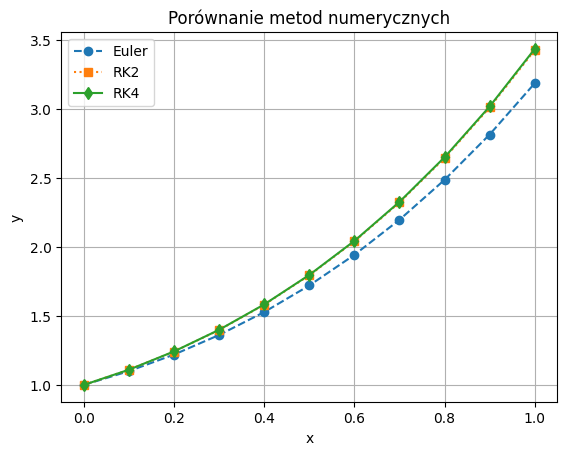

In [16]:
x0 = 0
y0 = 1
h = 0.1
x_kon = 1

x_euler, y_euler = solve_ode(euler_step, x0, y0, h, x_kon)
x_rk2, y_rk2 = solve_ode(rk2_step, x0, y0, h, x_kon)
x_rk4, y_rk4 = solve_ode(rk4_step, x0, y0, h, x_kon)

print(" x    |  Euler  |  RK2  |  RK4 ")
print("--------------------------------")
for i in range(len(x_euler)):
    print(f"{x_euler[i]:.1f}  | {y_euler[i]:.4f} | {y_rk2[i]:.4f} | {y_rk4[i]:.4f}")

plt.plot(x_euler, y_euler, label="Euler", marker='o', linestyle="dashed")
plt.plot(x_rk2, y_rk2, label="RK2", marker='s', linestyle="dotted")
plt.plot(x_rk4, y_rk4, label="RK4", marker='d', linestyle="solid")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Porównanie metod numerycznych")
plt.legend()
plt.grid()
plt.show()

###**Porównanie wyników**
Wyniki zostały zaprezentowane w tabeli oraz na wykresie. Można zauważyć, że:
* *Metoda Eulera* ma największe odchylenie i generuje większy błąd.
* *Metoda Heuna (RK2)* jest dokładniejsza od Eulera, ale wciąż nie tak precyzyjna jak RK4.
* *Metoda RK4* daje najbardziej dokładne wyniki.

###**Wnioski**
* Metoda RK4 jest najbardziej precyzyjna i zalecana, gdy wymagana jest dokładność.
* Metoda Eulera może być użyteczna dla przybliżonych i szybkich obliczeń.
* Metoda Heuna to kompromis między Eulerem a RK4.

#Zadanie 4
####Błąd lokalny i globalny dla metody Heuna
Wyznaczono błąd lokalny oraz błąd globalny metody Heuna (RK2) dla równania dx/dy = x + y, przy warunku początkowym y(0) = 1, znając rozwiązanie dokładne:\
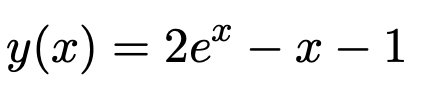

**Dane wejściowe**:
* Przedział obliczeń [0, 1], krok h = 0.1
* Rozwiązanie dokładne

**Dane wyjściowe**:
* Tabela wartości dokładnych i przybliżonych
* Tabela błędów lokalnych i globalnych

###**Cel zadania**
Celem jest obliczenie błędu lokalnego i globalnego metody Heuna (RK2) w porównaniu z rozwiązaniem dokładnym.

###**Obliczone błędy**
Błędy zapisano w tabeli, a także przedstawiono na wykresie.
* **Błąd lokalny** - różnica między wartością obliczoną a dokładną w danym punkcie.
* **Błąd globalny** - suma błędów lokalnych do danego punktu.

Zaimportowanie niezbędnych bibliotek i zdefiniowanie funkcji f(x, y) niezbędną do dalszych obliczeń:

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + y

Metoda Heuna (RK2):

In [18]:
def rk2_step(x, y, h):
    k1 = f(x, y)
    k2 = f(x + h, y + h * k1)
    return y + (h / 2) * (k1 + k2)

Dokładne rozwiązanie - implementacja:

In [19]:
def exact_solution(x):
    return 2 * np.exp(x) - x - 1

Obliczenia dla przedziału [0, 1] z krokiem h = 0.1:

In [20]:
x_values = np.arange(0, 1.1, 0.1)
y_values_rk2 = np.zeros(len(x_values))
y_values_exact = np.zeros(len(x_values))
local_errors = np.zeros(len(x_values))
global_errors = np.zeros(len(x_values))

Wartość początkowa:

In [21]:
y_values_rk2[0] = 1
y_values_exact[0] = exact_solution(0)

Iteracyjne obliczenie metody Heuna (RK2) i błędów:

In [22]:
for i in range(1, len(x_values)):
    y_values_rk2[i] = rk2_step(x_values[i-1], y_values_rk2[i-1], 0.1)
    y_values_exact[i] = exact_solution(x_values[i])
    local_errors[i] = abs(y_values_exact[i] - y_values_rk2[i])
    global_errors[i] = np.sum(local_errors[:i+1])

Wyświetlenie i wizualizacja wyników:

 x   | Heun RK2 | Dokładne rozwiązanie | Błąd lokalny | Błąd globalny
--------------------------------------------------------
0.0 | 1.00000 | 1.00000 | 0.00000 | 0.00000
0.1 | 1.11000 | 1.11034 | 0.00034 | 0.00034
0.2 | 1.24205 | 1.24281 | 0.00076 | 0.00110
0.3 | 1.39847 | 1.39972 | 0.00125 | 0.00235
0.4 | 1.58180 | 1.58365 | 0.00185 | 0.00420
0.5 | 1.79489 | 1.79744 | 0.00255 | 0.00674
0.6 | 2.04086 | 2.04424 | 0.00338 | 0.01012
0.7 | 2.32315 | 2.32751 | 0.00436 | 0.01448
0.8 | 2.64558 | 2.65108 | 0.00550 | 0.01999
0.9 | 3.01236 | 3.01921 | 0.00684 | 0.02683
1.0 | 3.42816 | 3.43656 | 0.00840 | 0.03523


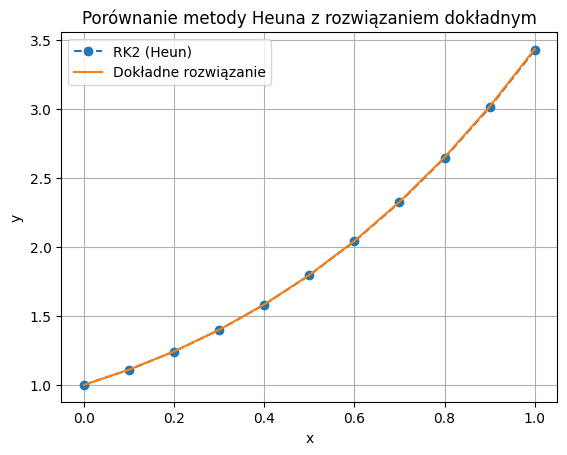

In [23]:
print(" x   | Heun RK2 | Dokładne rozwiązanie | Błąd lokalny | Błąd globalny")
print("--------------------------------------------------------")
for i in range(len(x_values)):
    print(f"{x_values[i]:.1f} | {y_values_rk2[i]:.5f} | {y_values_exact[i]:.5f} | {local_errors[i]:.5f} | {global_errors[i]:.5f}")

plt.plot(x_values, y_values_rk2, label="RK2 (Heun)", marker='o', linestyle="dashed")
plt.plot(x_values, y_values_exact, label="Dokładne rozwiązanie", linestyle="solid")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Porównanie metody Heuna z rozwiązaniem dokładnym")
plt.legend()
plt.grid()
plt.show()

###**Wnioski**
* Błąd lokalny w każdym kroku jest stosunkowo niewielki, ale sumuje się, powodując wzrost błędu globalnego.
* Metoda Heuna jest dokładniejsza niż metoda Eulera, ale nadal nie jest tak precyzyjna jak RK4.
* Wykres pokazuje, że RK2 dobrze aproksymuje rozwiązanie dokładne, ale zauważalne są drobne różnice.
